<a href="https://colab.research.google.com/github/ORCT/ds-section1-project/blob/main/Q1_genre_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 지역에 따라서 선호하는 게임 장르가 다를까

In [ ]:
from google.colab import files
files.upload();

Saving pre_vgames.csv to pre_vgames.csv


In [ ]:
import pandas as pd

df = pd.read_csv('pre_vgames.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16477 entries, 0 to 16476
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16477 non-null  int64  
 1   Name          16477 non-null  object 
 2   Platform      16477 non-null  object 
 3   Year          16477 non-null  int64  
 4   Genre         16477 non-null  object 
 5   Publisher     16476 non-null  object 
 6   NA_Sales      16477 non-null  float64
 7   EU_Sales      16477 non-null  float64
 8   JP_Sales      16477 non-null  float64
 9   Other_Sales   16477 non-null  float64
 10  Global_Sales  16477 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
#장르와 국가별 판매량에 대해서 feature engineering을 수행해야한다.
genre_sales = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
group_sales = genre_sales.groupby(['Genre']).sum()
group_sales.reset_index(inplace=True)
group_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,875.77,524.18,159.38,187.05
1,Adventure,104.04,63.94,51.87,16.78
2,Fighting,221.97,100.29,87.32,36.27
3,Misc,405.27,214.61,108.17,75.30
4,Platform,446.85,201.08,130.77,51.58
5,Puzzle,123.34,50.71,56.87,12.53
6,Racing,359.01,238.27,56.69,77.25
7,Role-Playing,327.24,188.04,352.14,59.61
8,Shooter,582.43,313.25,38.24,102.67
9,Simulation,182.43,113.36,63.64,31.45


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
melted = pd.melt(group_sales, id_vars=['Genre'], value_vars=group_sales.columns[1:],var_name='Country', value_name='Sales')
melted.head()

,Genre,Country,Sales
0,Action,NA_Sales,875.77
1,Adventure,NA_Sales,104.04
2,Fighting,NA_Sales,221.97
3,Misc,NA_Sales,405.27
4,Platform,NA_Sales,446.85


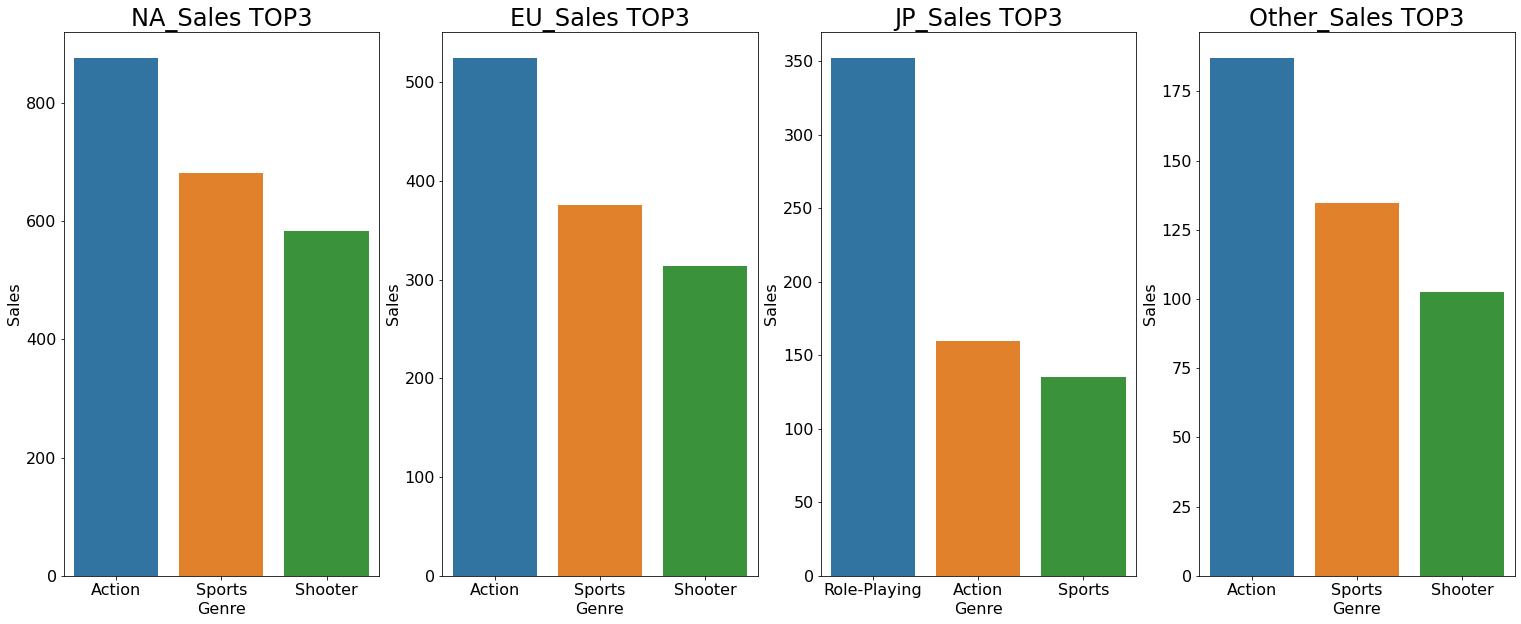

In [ ]:
# 국가별 장르 출고량 TOP3
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

# Top3 데이터 저장
na_genre_top3 = top3_genre(group_sales, 'NA_Sales')
eu_genre_top3 = top3_genre(group_sales, 'EU_Sales')
jp_genre_top3 = top3_genre(group_sales, 'JP_Sales')
other_genre_top3 = top3_genre(group_sales, 'Other_Sales')
# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = group_sales.columns[1:]
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('Genre', fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
plt.show()

미국, 유럽, 기타 국가의 경우 Action, Sports, Shooter 순으로 선호도를 보여주고 있지만 일본의 경우 Role-Playing, Action, Sports 순의 선호도를 보여주고 있으므로 지역에 따라 선호하는 게임의 장르가 다름을 알 수 있다.

###질문 1-1. 그렇다면 해당사항을 고려하여 신작 게임의 장르를 정해야 할 것인가?

판매 국가를 어떻게 정하는지에 따라 다를 것이다. 일본에만 판매를 한다면 Role-Playing 장르를 고려하는 것이 유리할 수 있지만, 모든 국가에 판매를 원한다면 Action 장르의 게임을 출시하는 것이 나을 것이다.

In [ ]:
global_sales = df[['Genre','Global_Sales']]
global_sales = global_sales.groupby(['Genre']).sum()
global_sales.reset_index(inplace=True)
global_sales.head()

,Genre,Global_Sales
0,Action,1746.38
1,Adventure,236.63
2,Fighting,445.85
3,Misc,803.35
4,Platform,830.28


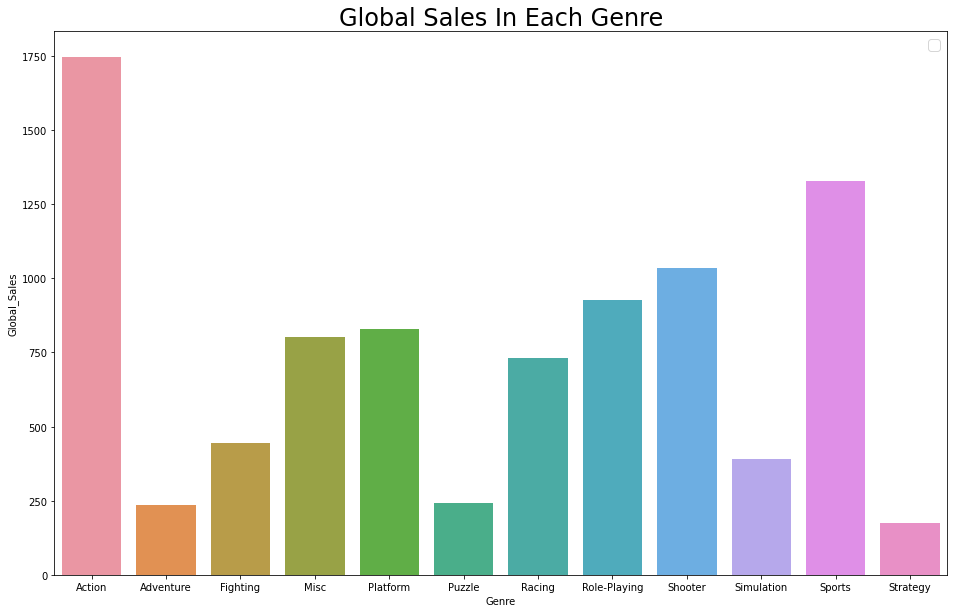

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(data=global_sales, x='Genre', y='Global_Sales')
plt.title('Global Sales In Each Genre', loc='center', fontsize=24)
plt.legend(fontsize=15)
plt.show()

해당 자료를 보면 알 수 있듯이 일본에서 롤플레잉 장르가 1위 판매량을 기록했다고는 하나 전세계적인 관점에서 봤을 때는 여전히 액션 장르가 판매량이 가장 높기 때문에 우리는 다음 분기에 액션 장르의 신작 게임을 만드는 것이 유리할 것으로 보인다.